# Домашняя работа №1

В этой домашней работе вам предлагается ознакомиться с базовой функциональностью Python и устройством Jupyter Notebook, а так же познакомиться с простыми функциями из пакетов NumPy и matplotlib.

Следуйте инструкциям нотебука, решайте задачи, а ответы заполняйте в следующую форму: https://forms.gle/gxG8D5BGeH1nxcSU8

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tasks import find_fold_number, rle, test_rle_str

# увеличим изначальный размер графиков
plt.figure(figsize=(15, 10))

# отображение графиков внутри нотебука
%matplotlib inline
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
# автоматическая перезагрузка функций из локальных модулей
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# NumPy & matplotlib

Для следующих заданий необходимо реализовать код внутри ячейки. Постарайтесь воспользоваться функциональностью пакетов, избегая ненужных циклов и т.п.

Про `NumPy` можно почитать тут:
[NumPy quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

Про `matplotlib` тут:
[PyPlot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)

В данной части задания будут базироваться на датасете $\textit{Ирисы Фишера}$, первым делом его необходимо скачать

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data -P assignment_1/data

--2020-02-29 16:02:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4,4K) [application/x-httpd-php]
Saving to: ‘assignment_1/data/iris.data’

iris.data           100%[===================>]   4,44K  --.-KB/s    in 0,001s  

2020-02-29 16:02:57 (7,96 MB/s) - ‘assignment_1/data/iris.data’ saved [4551/4551]



Ирисы Фишера состоят из данных о 150 экземплярах ириса — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

1. Длина наружной доли околоцветника (англ. sepal length);
2. Ширина наружной доли околоцветника (англ. sepal width);
3. Длина внутренней доли околоцветника (англ. petal length);
4. Ширина внутренней доли околоцветника (англ. petal width).

In [6]:
iris_full = np.genfromtxt('assignment_1/data/iris.data', delimiter=',', dtype='object')
names = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species')
iris_vals = iris_full[:, :-1].astype(np.float)
iris_name = iris_full[:, -1].astype(np.str)
n_iris = iris_vals.shape[0]

In [7]:
n_rows = 10
template = '{:^15}' * len(names)
print(template.format(*names))
for vals, name in zip(iris_vals[:n_rows], iris_name[:n_rows]):
    print(template.format(*vals, name))

  sepallength    sepalwidth     petallength    petalwidth       species    
      5.1            3.5            1.4            0.2        Iris-setosa  
      4.9            3.0            1.4            0.2        Iris-setosa  
      4.7            3.2            1.3            0.2        Iris-setosa  
      4.6            3.1            1.5            0.2        Iris-setosa  
      5.0            3.6            1.4            0.2        Iris-setosa  
      5.4            3.9            1.7            0.4        Iris-setosa  
      4.6            3.4            1.4            0.3        Iris-setosa  
      5.0            3.4            1.5            0.2        Iris-setosa  
      4.4            2.9            1.4            0.2        Iris-setosa  
      4.9            3.1            1.5            0.1        Iris-setosa  


## 1. Какое максимальное значение для каждого признака
Ответом будет последовательность из 4 чисел  
Например: `5.1 3.5 1.4 0.2`

In [65]:
maxs = iris_vals.max(axis=0); print(maxs)

[7.9 4.4 6.9 2.5]


## 2. Сколько каждого типа ириса представленно в данных
Ответом будет последовательность из 3 чисел в порядке: `Iris-setosa, Iris-versicolor, Iris-virginica`  
Например: `10 10 10`

In [70]:
names, counts = np.unique(iris_name, return_counts=True); print(names, counts)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] [50 50 50]


## 3. Среднее значение признака `petalwidth` для каждого типа ириса
Ответом будет последовательность в возврастающем порядке с округлением до 2 знаков после запятой.  
Например: `1.23 4.56 7.89` 

In [191]:
print([(np.mean(np.compress(iris_name == name, iris_vals[:, 3]), dtype=np.float64), name) for name in names])

[(0.244, 'Iris-setosa'), (1.3260001, 'Iris-versicolor'), (2.026, 'Iris-virginica')]


## 4. Попарное скалярное произведение признаков
Ответом будет среднее значение попарных скалярных произведений векторов признаков с округлением до 2 знаков после запятой.  
Скалярное произведение вектора с самим собой учитывать не надо.  
Например: `12.34`

In [201]:
np.mean([iris_vals[:, i] @ iris_vals[:, j] for i in range(0, 4) for j in range(0, 4) if i != j], dtype=np.float64)

1726.2150000000001

## 5. У какого типа ириса самое маленькое значение признака `sepalwidth`

In [96]:
print([(np.min(np.compress(iris_name == name, iris_vals[:, 1])), name) for name in names])

[(2.3, 'Iris-setosa'), (2.0, 'Iris-versicolor'), (2.2, 'Iris-virginica')]


## 6. Постройте график распределения значений для `petallength` взависимости от типа ириса
В качестве ответа укажите тип ириса с наименьшей дисперсией (самый "узкий")

[(0.029504000000000002, 'Iris-setosa'), (0.21640000000000004, 'Iris-versicolor'), (0.29849600000000004, 'Iris-virginica')]


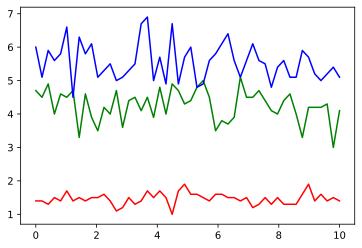

In [126]:
[plt.plot(np.linspace(0, 10, 50), np.compress(iris_name == name, iris_vals[:, 2]), color) for (name, color) in np.vstack((names, ['r', 'g', 'b'])).T];
print([(np.var(np.compress(iris_name == name, iris_vals[:, 2])), name) for name in names])

## 7. Отобразите зависимость между `petallength` и `petalwidth` взависимости от типа ириса
по оси X - petallength   
по оси Y - petalwidth  
В ответе укажите класс, который отделился от остальных

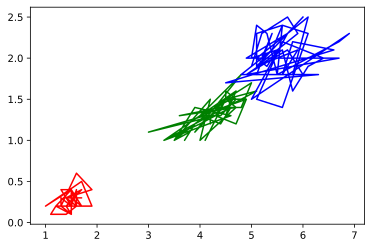

In [125]:
[plt.plot(np.compress(iris_name == name, iris_vals[:, 2]), np.compress(iris_name == name, iris_vals[:, 3]), color) for (name, color) in np.vstack((names, ['r', 'g', 'b'])).T];

## 8. Постройте boxplot признака `sepallength` для каждого типа Ириса
В ответе укажите количество выбросов в данных  
Каждый выброс отображается точкой, подробнее про boxplot можно почитать [здесь](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

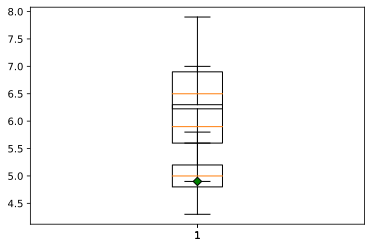

In [145]:
[plt.boxplot(np.compress(iris_name == name, iris_vals[:, 0]), flierprops=dict(markerfacecolor='g', marker='D')) for name in names];

# Python
Для следующих заданий необходимо реализовать соответствующую функцию в файле `tasks.py`.

После реализации, выполните соответствующую ячейку, не изменяя её содержимое.

## 9. За сколько шагов можно получить однозначное число перемножая цифры предыдущего числа.
Например, для $88$ ответ $3$:
$$
88 \rightarrow 8 \times 8 = 64 \rightarrow 6 \times 4 = 24 \rightarrow 2 \times 4 = 8
$$
Для этого задания, реализуйте функцию `find_fold_number`

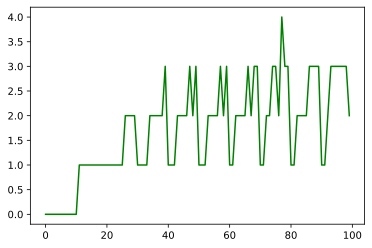

In [169]:
plt.plot(np.arange(100), [find_fold_number(x) for x in np.arange(100)], 'g-');

В качестве ответа укажите результат выполнения следующей ячейки (без кавычек)

In [168]:
''.join(map(str, (find_fold_number(i) for i in range(500))))

'00000000000111111111111111222211112222231112222323111222232311222232331122332433112222333311233333321111111111111111111111111122221111222223111222232311122223231122223233112233243311222233331123333332111111111111111122221112222323112222323311222233331122222222122332334212323234231223324233123332233311111111111111222223112222323311233333321223323342122324222312333223331223323444123342343313322334331111111111111222232311222233331223323342122332423312222222221233423433133322443312343233341332323343'

## 10. Кодирование длин серии
Кодирование длин серий (RLE) — алгоритм сжатия данных, заменяющий повторяющиеся символы на один символ и число его повторов. Серией называется последовательность, состоящая из нескольких одинаковых символов (более одного). При кодировании строка одинаковых символов, составляющих серию, заменяется строкой, содержащей сам повторяющийся символ и количество его повторов.

Например, для $\textit{AAAAAAAAAAAAAAABAAAA}$ будет сжата в $\textit{A15BA4}$

Для этого задания реализуйте функцию `rle`

In [189]:
print(rle('AAAAAAAAAAAAAAABAAAA'))
assert rle('AAAAAAAAAAAAAAABAAAA') == 'A15BA4', "неправильный ответ для строки из примера"

A15BA4


В качестве ответа укажите результат выполнения следующей ячейки (без кавычек)

In [190]:
rle(test_rle_str)

'f4b13s13g15e12l18o12f4i6r14u8m5i15q3x17z6w4z19o7k10i16z16h7o10c14r7k3x17k2s8mc3d11p14n14s12b5ra6sj10k9r9y12a11u12w10g8l9v11b2g15q6l15x10a5e13v13d11pc4d16p15s12d18z19a19bf9k5x5w5h12t9r18o19c16p3h12u6r19y17j24g3a3x11l8u10m10f6m18g14t3j19'